In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Datasets/births_by_age_of_mother_1960_2013.csv')
data.head(10)

   year          age   count
0  1960     UNDER 15     443
1  1960        15-19   54010
2  1960        20-24  128313
3  1960        25-29   94704
4  1960        30-34   57569
5  1960        35-39   29540
6  1960        40-44    6865
7  1960  45 AND OVER     338
8  1960      UNKNOWN      17
9  1961     UNDER 15     487


In [3]:
# first remove all records with age of mother "unknown":
data = data[data.age != 'UNKNOWN']
data.head(10)

    year          age   count
0   1960     UNDER 15     443
1   1960        15-19   54010
2   1960        20-24  128313
3   1960        25-29   94704
4   1960        30-34   57569
5   1960        35-39   29540
6   1960        40-44    6865
7   1960  45 AND OVER     338
9   1961     UNDER 15     487
10  1961        15-19   57040


In [4]:
# save the age groups for later use:
age_groups = data['age'].unique()
age_groups

['UNDER 15' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45 AND OVER']


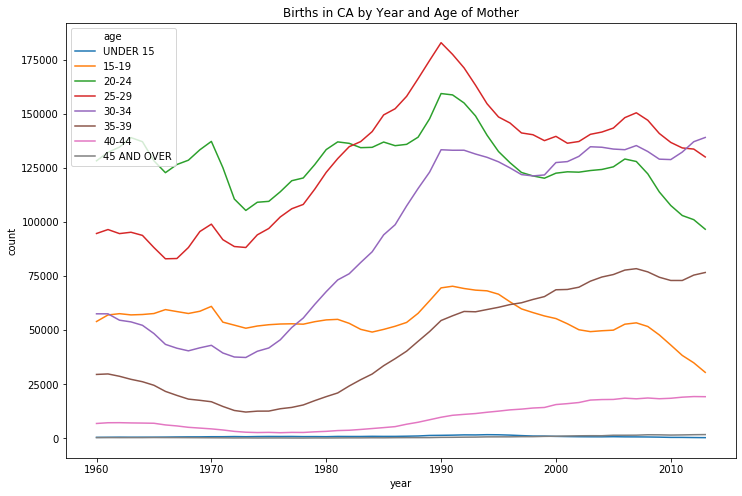

In [5]:
# line plots for all years and all age groups:

plt.figure(figsize=(12,8))

sns.lineplot(x='year', y='count', hue='age', data=data, legend='full')

plt.title('Births in CA by Year and Age of Mother')

plt.show()

In [6]:
# let's say we want to see births for mothers of ages 20-29 and 30-39 as percentages of total births by year
# first, pivot the dataframe so 1 year = 1 row:
data_by_year = pd.pivot_table(data, values="count", index="year", columns=data['age'], aggfunc=np.sum)
data_by_year.head(10)

age   15-19   20-24  25-29  30-34  35-39  40-44  45 AND OVER  UNDER 15
year                                                                  
1960  54010  128313  94704  57569  29540   6865          338       443
1961  57040  132238  96532  57559  29771   7204          341       487
1962  57631  134639  94653  54619  28689   7238          322       536
1963  57068  139040  95284  53837  27281   7121          328       509
1964  57248  137151  93823  52256  26171   7056          326       525
1965  57700  128304  88199  48446  24529   6965          369       531
1966  59517  122823  83010  43441  21702   6194          341       572
1967  58608  126597  83140  41664  19841   5729          335       635
1968  57722  128586  88215  40450  18134   5093          310       674
1969  58753  133409  95621  41847  17569   4731          282       681


In [7]:
# add a total column:
data_by_year['total'] = data_by_year.sum(axis=1)
data_by_year.head()

age   15-19   20-24  25-29  30-34  35-39  40-44  45 AND OVER  UNDER 15   total
year                                                                          
1960  54010  128313  94704  57569  29540   6865          338       443  371782
1961  57040  132238  96532  57559  29771   7204          341       487  381172
1962  57631  134639  94653  54619  28689   7238          322       536  378327
1963  57068  139040  95284  53837  27281   7121          328       509  380468
1964  57248  137151  93823  52256  26171   7056          326       525  374556


In [8]:
# sum the data we are interested in inspecting:
data_by_year['20-29'] = data_by_year['20-24'] + data_by_year['25-29']
data_by_year['30-39'] = data_by_year['30-34'] + data_by_year['35-39']
data_by_year.head()

age   15-19   20-24  25-29  30-34  35-39  40-44  45 AND OVER  UNDER 15  \
year                                                                     
1960  54010  128313  94704  57569  29540   6865          338       443   
1961  57040  132238  96532  57559  29771   7204          341       487   
1962  57631  134639  94653  54619  28689   7238          322       536   
1963  57068  139040  95284  53837  27281   7121          328       509   
1964  57248  137151  93823  52256  26171   7056          326       525   

age    total   20-29  30-39  
year                         
1960  371782  223017  87109  
1961  381172  228770  87330  
1962  378327  229292  83308  
1963  380468  234324  81118  
1964  374556  230974  78427  


In [9]:
# remove columns we don't need anymore: 
data_by_year.drop(columns=age_groups, axis=1, inplace=True)
data_by_year.head()

age    total   20-29  30-39
year                       
1960  371782  223017  87109
1961  381172  228770  87330
1962  378327  229292  83308
1963  380468  234324  81118
1964  374556  230974  78427


In [10]:
# calculate the percentages:
for column in ['20-29', '30-39']:
    data_by_year[column] = round((data_by_year[column]/data_by_year['total'])*100, 2)
data_by_year.head()

age,total,20-29,30-39
year,,,
1960,371782,59.99,23.43
1961,381172,60.02,22.91
1962,378327,60.61,22.02
1963,380468,61.59,21.32
1964,374556,61.67,20.94


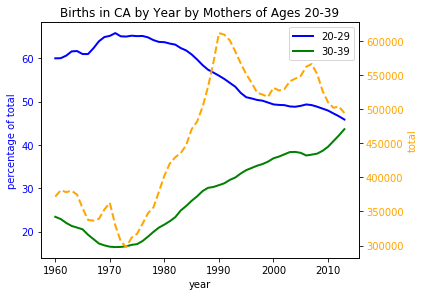

In [11]:
# now we can visualize those percentages over the years:

fig, ax1 = plt.subplots()

ax1.set_xlabel('year')
ax1.set_ylabel('percentage of total', color='blue')
ax1.plot('20-29', data=data_by_year, color='blue', linewidth=2, label="20-29")
ax1.plot('30-39', data=data_by_year, color='green', linewidth=2, label="30-39")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend()

ax2 = ax1.twinx()

ax2.set_ylabel('total', color='orange')
ax2.plot('total', data=data_by_year, color='orange', linewidth=2, linestyle='dashed', label="total")
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()

plt.title('Births in CA by Year by Mothers of Ages 20-39')

plt.show()

In [13]:
# if we want to look at more detailed visualizations, let's first divide the original dataset into "chunks":

data1960to1969 = data.iloc[:90,:]
data1970to1979 = data.iloc[90:180,:]
data1980to1989 = data.iloc[180:270,:]
data1990to1999 = data.iloc[270:360,:]
data2000to2009 = data.iloc[360:450,:]
data2010to2013 = data.iloc[450:,:]

<Figure size 864x576 with 0 Axes>

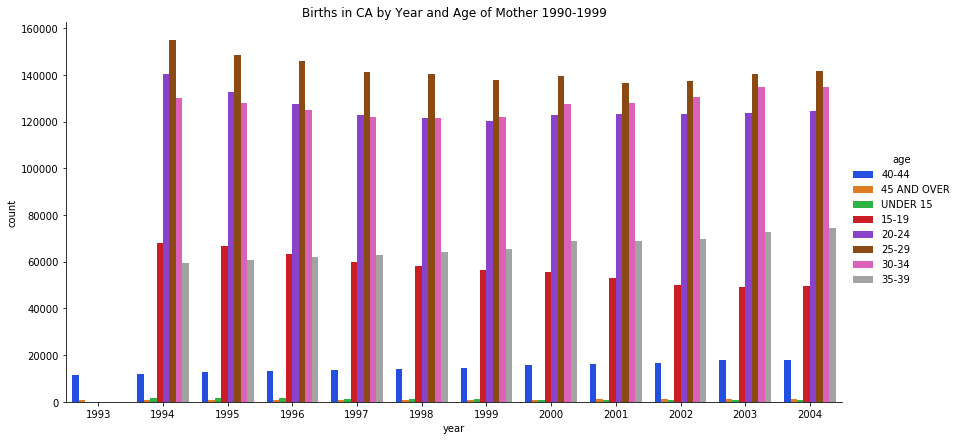

In [14]:
# now we can visualize those "chunks" separately
# for example, let's say we're interested in the period between 1990 and 1999:

plt.figure(figsize=(12,8))

sns.catplot(x='year', y='count', hue='age', palette='bright',
            data=data1990to1999, kind='bar', height=6, aspect=2)

plt.title('Births in CA by Year and Age of Mother 1990-1999')

plt.show()